<a href="https://colab.research.google.com/github/nh0875/Estadistica-y-Exploracion-de-Datos-Hilliard/blob/main/Clasification_Model_(Mesothelioma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Mesothelioma Disease
**Descripcion del Dataset**: Es un data set real con datos sobre pacientes diagosticados y tratados por el tipo de Cancer Mesotelioma, con 324x34,

**Problema planteado**: Mi problema principal es encontrar un modelo que pueda generalizar casos de Mesothelioma, para un poder ser usado en el diagostico de nuevos pacientes, sabiendo que la principal causa del Mesothelioma es la exposicion a asbestos y personas que tengan entre 50 y 70 años


**Dataset Description:**
This is a real dataset containing data on patients diagnosed and treated for Mesothelioma cancer, with dimensions of 324x34.

**Problem Statement:**
The primary problem is to find a model that can generalize Mesothelioma cases to be used in diagnosing new patients, considering that the main cause of Mesothelioma is asbestos exposure and it primarily affects people aged between 50 and 70.


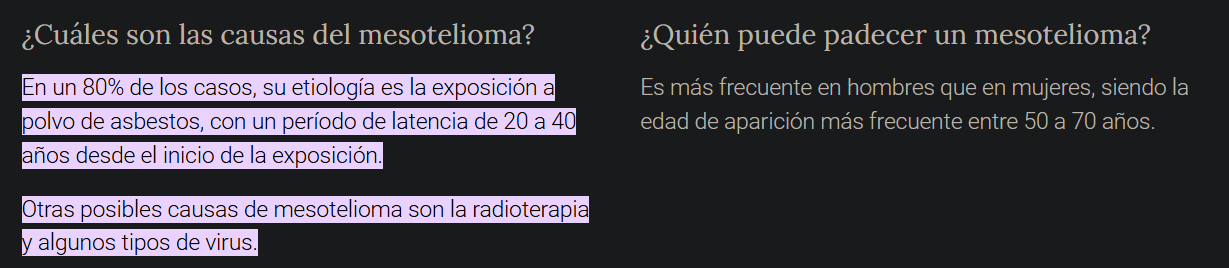


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset / Load my Dataset
df = pd.read_excel('/content/Mesothelioma data set.xlsx')

# Selección de features y target / Select the features and target
features = ['asbestos exposure', 'duration of asbestos exposure', 'habit of cigarette', 'age']
X = df[features]
y = df['class of diagnosis']
print(df.to_string())

     age  gender  city  asbestos exposure  type of MM  duration of asbestos exposure  diagnosis method  keep side  cytology  duration of symptoms  dyspnoea  ache on chest  weakness  habit of cigarette  performance status  white blood  cell count (WBC)  hemoglobin (HGB)  platelet count (PLT)  sedimentation  blood lactic dehydrogenise (LDH)  alkaline phosphatise (ALP)  total protein  albumin  glucose  pleural lactic dehydrogenise  pleural protein  pleural albumin  pleural glucose  dead or not  pleural effusion  pleural thickness on tomography  pleural level of acidity (pH)  C-reactive protein (CRP)  class of diagnosis
0     65       0     4                  1           0                             45                 1          1         0                   9.0         1              0         1                   0                   0         6789                10                 0                   544             76                               576                          46        

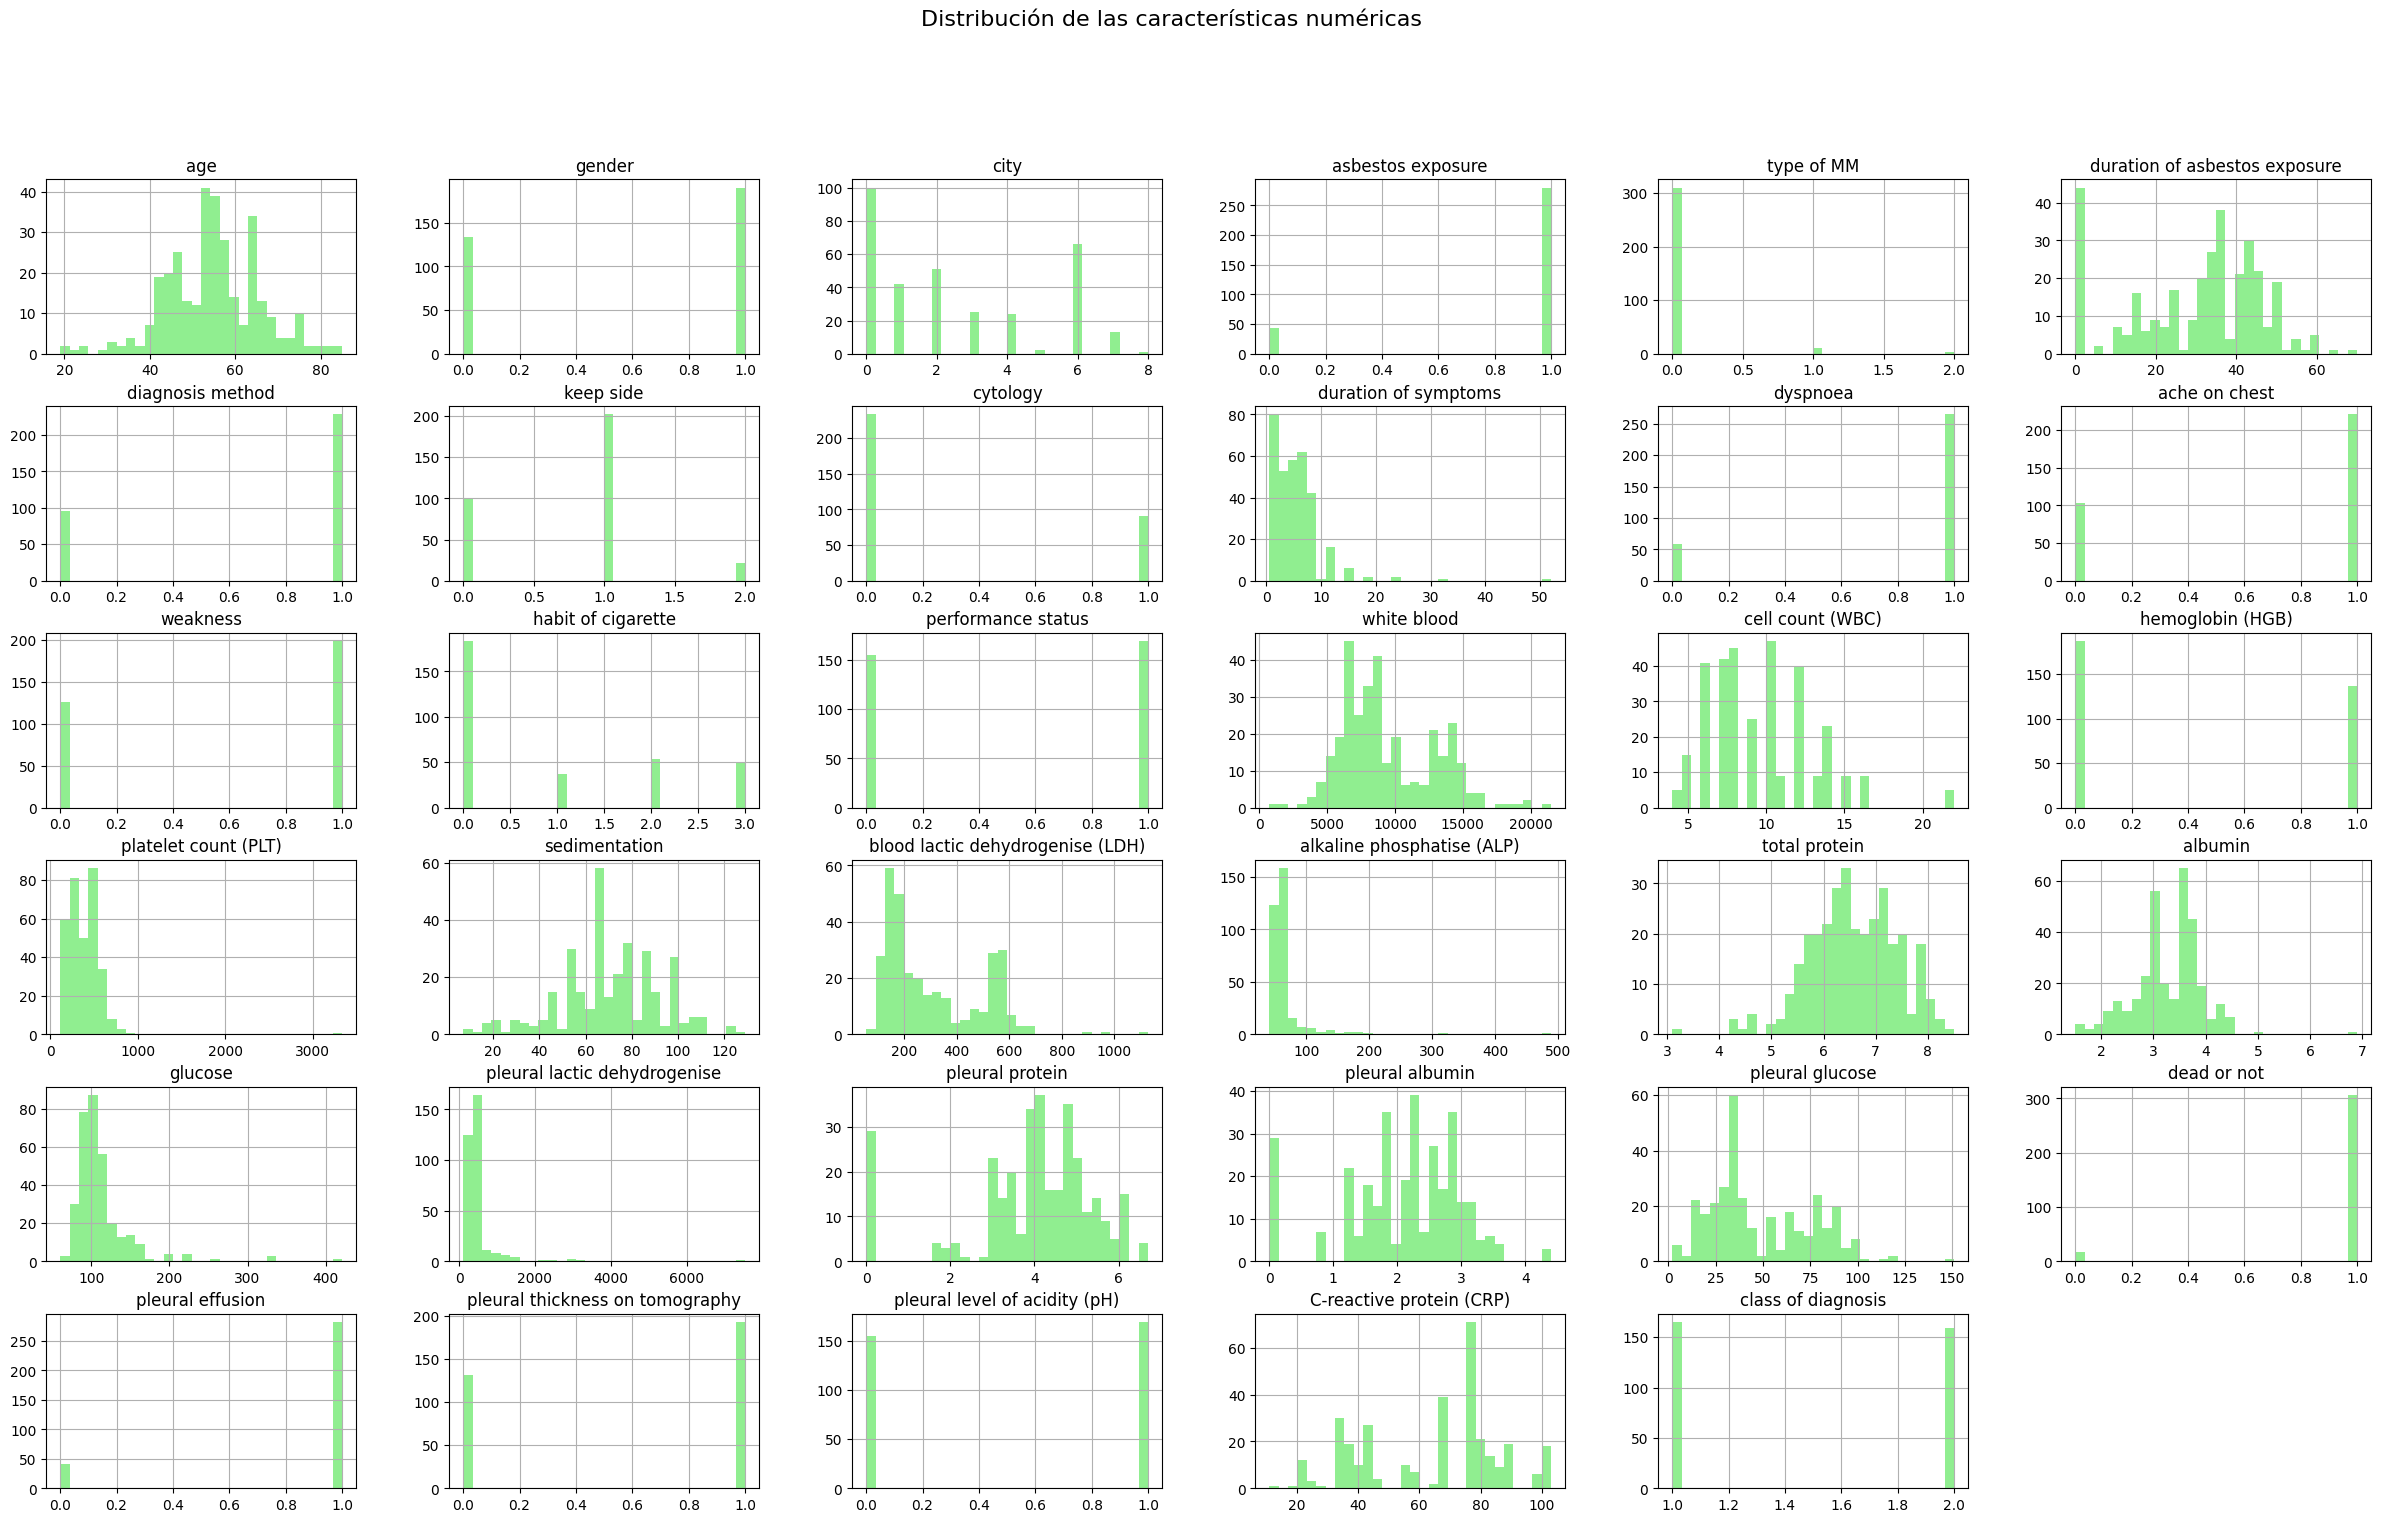

In [12]:
# Visualización de las distribuciones (columnas numéricas) / Visualization of Distributions (Numerical Columns):
df.hist(bins=30, figsize=(30, 17), color='lightgreen')
plt.suptitle('Distribución de las características numéricas', fontsize=16)
plt.show()

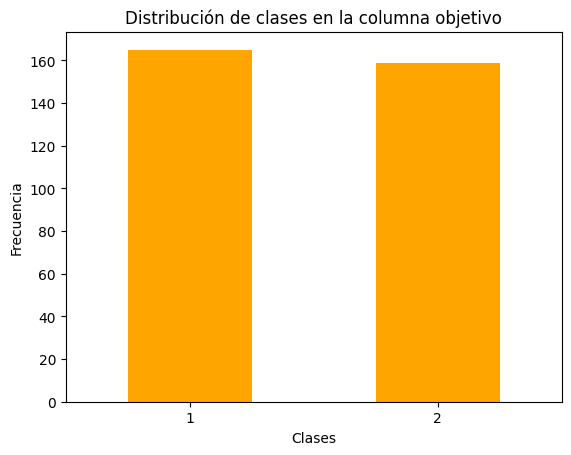

In [13]:
# Distribución de clases en la columna objetivo / Class Distribution in the Target Column
if 'class of diagnosis' in df.columns:
    df['class of diagnosis'].value_counts().plot(kind='bar', color='orange')
    plt.title('Distribución de clases en la columna objetivo')
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# Preprocesamiento

El objetivo de mis modelos de clasificacion es saber que tan buenos son para indetificar la clase de diagnostico que se le deberia dar al paciente, es una clasificacion binaria ya que solo hay dos clases (1,2). Dividi el dataset en Train y Test.

Features elegidas: "asbestos exposure" y "duration of asbestos exposure" teniendo en cuenta de que si la persona estuvo expuesta a Abestos, su probabilidad de contraer Mesothelioma aumenta significativamente, tambien la feature "Age", usando la informacion que recopile desde la Universidad de Medicina de Navarra, la ultima feature que voy a elegir va a ser "habit of cigarette" ya que el cigarrillo tambien afecta a los pulmones complementando a las features referidas al asbesto

Variable Objetivo: Class of Diagnosis


# Preprocessing

The goal of my classification models is to evaluate how well they can identify the appropriate diagnosis class for the patients. This is a binary classification problem as there are only two classes (1, 2). I split the dataset into Train and Test sets and applied cross-validation since the target variable is imbalanced.

Chosen Features:

"Asbestos Exposure" and "Duration of Asbestos Exposure": Since exposure to asbestos significantly increases the likelihood of developing Mesothelioma.
"Age": Based on information collected from the University of Navarra School of Medicine, the disease primarily affects individuals aged 50-70.
"Habit of Cigarette": Smoking also affects the lungs, complementing the asbestos-related features.

Objective Feature:"Class of diagnosis
"

In [14]:
df[features] = df[features].fillna(df[features].mean())

# Estandarización de las características
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Definir la columna objetivo
y = df['class of diagnosis']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento y evaluación de los Modelos (Arbol de Decision y Random Forest)
#Model Training and Evaluation (Decision Tree and Random Forest):

El modelo que elegi para alterar su hiperparametro y evaluar su desempeño sera el K-Neighbors, voy a evaluar a mis modelos con una matriz de confusion y un reporte de clasificacion

The model chosen to tune its hyperparameters and evaluate its performance is K-Neighbors.


In [15]:
# Definir validación cruzada / I define a cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar los resultados /
results = {'n_estimators': [], 'max_depth': [], 'f1_rf_cv': [], 'accuracy_rf_cv': [], 'f1_tree_cv': [], 'accuracy_tree_cv': []}

# Rango de hiperparámetros para Random Forest
n_estimators_range = [10, 50, 100, 150]
max_depth_range = [5, 10, 15, 20]

# Métrica personalizada para validación cruzada
f1_scorer = make_scorer(f1_score, average='weighted')

# Entrenamiento y evaluación de modelos con validación cruzada / Training and testing of models whit cross validation
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Modelo Random Forest / Random Forest Model
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, class_weight='balanced', random_state=42)

        # Validación cruzada para Random Forest / Cross Validation for Random Forest
        f1_rf_scores = cross_val_score(rf, X, y, cv=cv, scoring=f1_scorer)
        acc_rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

        # Promedio de las métricas / Mean of Metrics
        f1_rf_cv = f1_rf_scores.mean()
        acc_rf_cv = acc_rf_scores.mean()

        # Modelo Decision Tree / Decision Tree Model
        tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

        # Validación cruzada para Decision Tree / Cross Validation for Decision Tree
        f1_tree_scores = cross_val_score(tree, X, y, cv=cv, scoring=f1_scorer)
        acc_tree_scores = cross_val_score(tree, X, y, cv=cv, scoring='accuracy')

        # Promedio de las métricas / Metrics Mean
        f1_tree_cv = f1_tree_scores.mean()
        acc_tree_cv = acc_tree_scores.mean()

        # Guardar resultados / Save Results
        results['n_estimators'].append(n_estimators)
        results['max_depth'].append(max_depth)
        results['f1_rf_cv'].append(f1_rf_cv)
        results['accuracy_rf_cv'].append(acc_rf_cv)
        results['f1_tree_cv'].append(f1_tree_cv)
        results['accuracy_tree_cv'].append(acc_tree_cv)

# Convertir resultados a DataFrame / Make my results a Dataframe
results_df = pd.DataFrame(results)

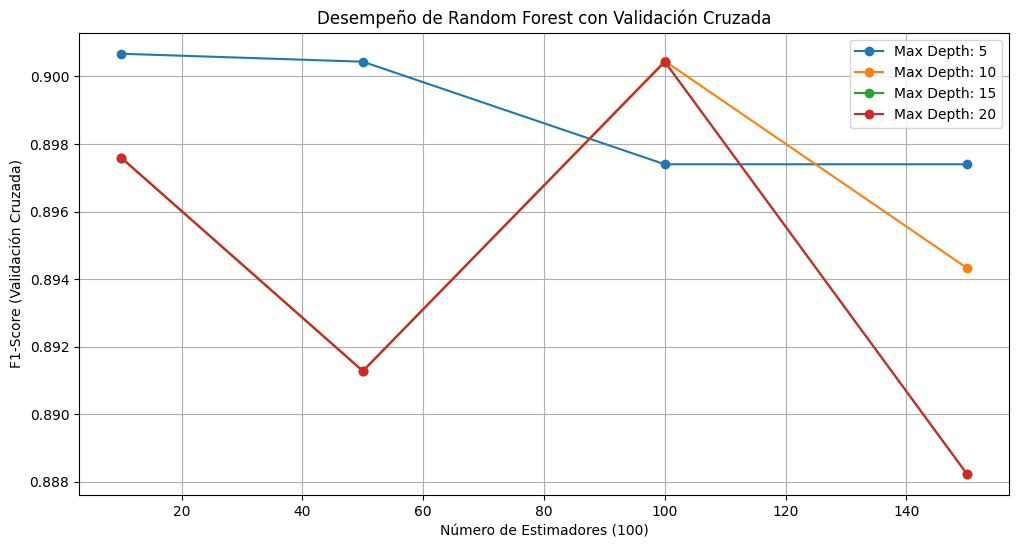

In [16]:
# Graficar desempeño de Random Forest con validación cruzada
plt.figure(figsize=(12, 6))
for max_depth in max_depth_range:
    subset = results_df[results_df['max_depth'] == max_depth]
    plt.plot(subset['n_estimators'], subset['f1_rf_cv'], label=f'Max Depth: {max_depth}', marker='o')

plt.xlabel('Número de Estimadores (100)')
plt.ylabel('F1-Score (Validación Cruzada)')
plt.title('Desempeño de Random Forest con Validación Cruzada')
plt.legend()
plt.grid()
plt.show()

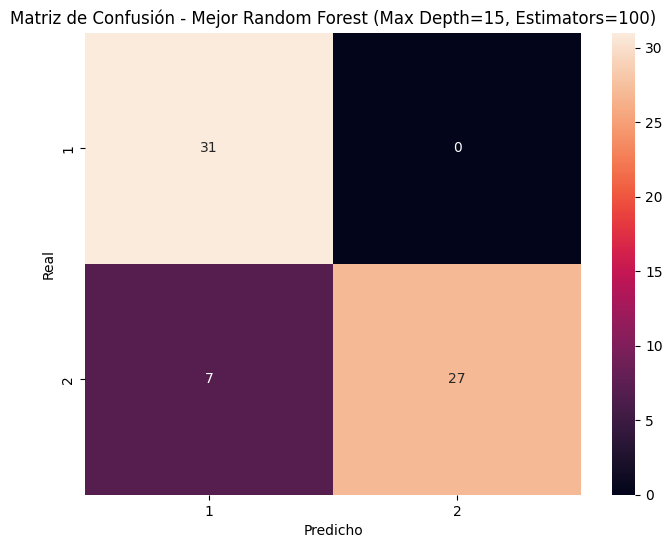


Reporte de Clasificación para el Mejor Random Forest:

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        31
           2       1.00      0.79      0.89        34

    accuracy                           0.89        65
   macro avg       0.91      0.90      0.89        65
weighted avg       0.91      0.89      0.89        65



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configuración del mejor modelo de Random Forest
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)

# Entrenar el mejor modelo / Train the best Model
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
# Matriz de Confusión para el mejor modelo Random Forest / COnfusion Matrix for the best Random Forest Model
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
classes = np.unique(y_test)

# Visualización de la Matriz de Confusión con valores numéricos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión - Mejor Random Forest (Max Depth=15, Estimators=100)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación para el mejor modelo Random Forest
print("\nReporte de Clasificación para el Mejor Random Forest:\n")
print(classification_report(y_test, y_pred_best_rf))


In [18]:
# Desescalamos para que coincidan con los valores originales
X_test_original = scaler.inverse_transform(X_test)
# Redondear columnas específicas para evitar errores de precisión
X_test_df = pd.DataFrame(X_test_original, columns=features)  # Convertimos a DataFrame

# Agregar las predicciones y valores reales
X_test_df['Predicción'] = y_pred_best_rf
X_test_df['Real'] = y_test.values  # Convertir y_test a una serie compatible si es necesario

# Filtrar por clase 1 y clase 2
clase_1 = X_test_df[X_test_df['Predicción'] == 1]
clase_2 = X_test_df[X_test_df['Predicción'] == 2]

# Al desescalar los datos la columna asbestos exposure (Clase 1) se muestra con notacion cientifica por eso aplico un round
X_test_df['asbestos exposure'] = X_test_df['asbestos exposure'].astype(int)

# Mostrar las primeras filas de cada clase
print("Clase 1:")
print(clase_1.head().to_string())
print("\nClase 2:")
print(clase_2.head().to_string())

Clase 1:
   asbestos exposure  duration of asbestos exposure  habit of cigarette   age  Predicción  Real
0      -1.110223e-16                            0.0                 0.0  56.0           1     1
1       1.000000e+00                           32.0                 2.0  55.0           1     1
2       1.000000e+00                           50.0                 0.0  73.0           1     2
3       1.000000e+00                           55.0                 0.0  63.0           1     1
5      -1.110223e-16                            0.0                 3.0  55.0           1     1

Clase 2:
    asbestos exposure  duration of asbestos exposure  habit of cigarette   age  Predicción  Real
4        1.000000e+00                           37.0                 0.0  47.0           2     2
9        1.000000e+00                           44.0                 2.0  47.0           2     2
10       1.000000e+00                           50.0                 0.0  51.0           2     2
12      -1.110223

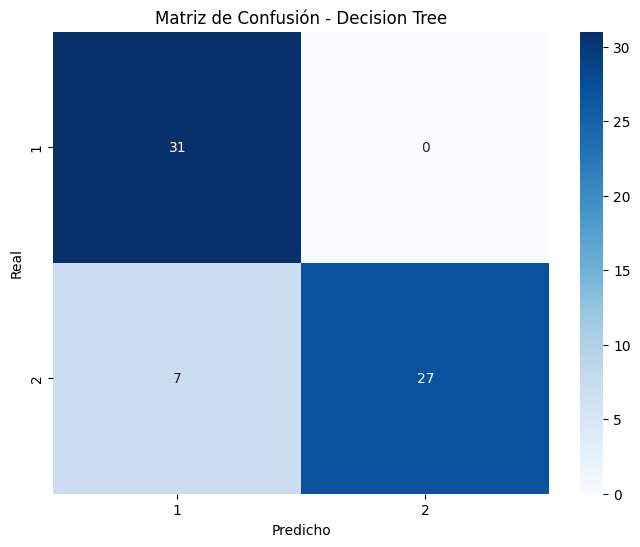


Reporte de Clasificación para el Decision Tree:

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        31
           2       1.00      0.79      0.89        34

    accuracy                           0.89        65
   macro avg       0.91      0.90      0.89        65
weighted avg       0.91      0.89      0.89        65



In [19]:
best_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
best_tree_model.fit(X_train, y_train)
y_pred_best_tree = best_tree_model.predict(X_test)

# Matriz de Confusión para el mejor modelo Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_best_tree)

# Visualización de la Matriz de Confusión con valores numéricos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, cmap = "Blues", xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión - Decision Tree')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación para el modelo Decision Tree
print("\nReporte de Clasificación para el Decision Tree:\n")
print(classification_report(y_test, y_pred_best_tree))

In [20]:
X_test_original = scaler.inverse_transform(X_test)  # Desescalamos para que coincidan con los valores originales
X_test_df_tree = pd.DataFrame(X_test_original, columns=features)  # Convertimos a DataFrame

# Agregar las predicciones y valores reales
X_test_df_tree['Predicción'] = y_pred_best_tree
X_test_df_tree['Real'] = y_test.values

# Filtrar por clase 1 y clase 2
clase_1_tree = X_test_df_tree[X_test_df_tree['Predicción'] == 1]
clase_2_tree = X_test_df_tree[X_test_df_tree['Predicción'] == 2]

# Ajustar la columna 'asbestos exposure' para mejor visualización
X_test_df_tree['asbestos exposure'] = X_test_df_tree['asbestos exposure'].astype(int)

# Mostrar las primeras filas de cada clase
print("\nClase 1 - Decision Tree:")
print(clase_1_tree.head().to_string())
print("\nClase 2 - Decision Tree:")
print(clase_2_tree.head().to_string())


Clase 1 - Decision Tree:
   asbestos exposure  duration of asbestos exposure  habit of cigarette   age  Predicción  Real
0      -1.110223e-16                            0.0                 0.0  56.0           1     1
1       1.000000e+00                           32.0                 2.0  55.0           1     1
2       1.000000e+00                           50.0                 0.0  73.0           1     2
3       1.000000e+00                           55.0                 0.0  63.0           1     1
5      -1.110223e-16                            0.0                 3.0  55.0           1     1

Clase 2 - Decision Tree:
    asbestos exposure  duration of asbestos exposure  habit of cigarette   age  Predicción  Real
4        1.000000e+00                           37.0                 0.0  47.0           2     2
9        1.000000e+00                           44.0                 2.0  47.0           2     2
10       1.000000e+00                           50.0                 0.0  51.0   

# Analisis de Experiencia
Me encanto trabajar este dataset sinceramente, me encantaria en mi futuro como profesional de la ciencia de datos trabajar en un hospital con estos tipos de datos, ya que me encanta ayudar a las personas, me gusto aprender sobre este tipo de cancer

# Analisis del trabajo
Al tener clases desbalanceadas mis modelos presentaron underfitting en la clase 2 (menor cantidad de datos), apliqué un cross validation para que mis modelos mejoraran el rendimiento, el desempeño de mi random forest con profundidad de 15 y estimadores de 100 fue elegido porque no presentaba under feeding como si lo hacía un decision tree con menor profundidad por ejemplo el de 5, y tampoco presentaba overfitting como si lo hacían modelos de mayor profundidad el análisis de mis métricas de random forest presentan un f1 de 76% en la clase 1 y un 20% en la clase 2 muy bajo pero no supe solucionar este problema de under feeling en la clase 2 teniendo en cuenta que estaban desbalanceado mis datos, agregué un pequeño data frame donde se podían ver las características de los datos como la predicción y su resultado real, en mi árbol de decisión también presenté under feeling en la clase 2 no tanto como en el random forest pero sí fue bajo el valor del f1-score, clase 1 del 74% y en la clase 2 un 33%, para mi árbol de decisión también mostré en un pequeño data frame cuáles eran las características y la predicción del dato como el valor real

Referencias: https://cancercenter.cun.es/todo-sobre-cancer/tipos-cancer/mesotelioma-pleural#:~:text=En%20un%2080%25%20de%20los,y%20algunos%20tipos%20de%20virus.

ChatGPT: Crea dos modelos de clasificacion, uno RF y otro que sea Decision Tree, las features que voy a tener como target seran ('asbestos exposure', 'duration of asbestos exposure', 'habit of cigarette', 'age')

informacion de clases pasadas, y los notebooks dados en las mismas, correciones del coloquio
